# A/B Testing or Split Testing

#### A/B testing (also called split testing) is a randomized experiment where two or more variants (A and B) of a variable are shown to different segments of users at the same time. 
#### The goal is to determine which version has a more significant impact on a chosen metric (e.g., conversion rate, click-through rate)

### Objective
##### To determine whether exposure to advertisements (ads) leads to a higher product purchase rate 
##### compared to exposure to a Public Service Announcement (PSA) or no ad at all.

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

### 2. Load the Dataset

In [2]:
df=pd.read_csv(r"marketing_AB.csv")

### 3.Basic EDA(Exploratory Data Analysis)

In [3]:
# shows first 5 rows
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
#user_id-Unique identifier for each participant
#group-Indicates whether the user is in the 'ad'-advertisements (experimental) or 'psa'-Public Service Announcement (control) group
#purchase-Boolean: True if the user made a purchase, False otherwise
#num_ads_seen-Number of ads the user saw
#peak_day-The day when the user saw the highest number of ads
#peak_hour-The hour of the day when the user saw the highest number of ads

In [5]:
# Returns (rows,columns)
df.shape

(588101, 7)

In [6]:
# Data Types (non-null counts)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [7]:
df.dtypes

Unnamed: 0        int64
user id           int64
test group       object
converted          bool
total ads         int64
most ads day     object
most ads hour     int64
dtype: object

In [8]:
df.columns

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

In [9]:
df.index

RangeIndex(start=0, stop=588101, step=1)

In [10]:
df.isnull().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [11]:
# Dropping unnecessary columns
df = df.drop(columns=['Unnamed: 0'])

In [12]:
# Summary statistics for numeric columns
df[['total ads', 'most ads hour']].describe()

,total ads,most ads hour
count,588101.000000,588101.000000
mean,24.820876,14.469061
std,43.715181,4.834634
min,1.000000,0.000000
25%,4.000000,11.000000
50%,13.000000,14.000000
75%,27.000000,18.000000
max,2065.000000,23.000000


In [13]:
# Variance
df[['total ads', 'most ads hour']].var()

total ads        1911.017007
most ads hour      23.373685
dtype: float64

In [14]:
# Correlation
df[['total ads', 'most ads hour']].corr()

,total ads,most ads hour
total ads,1.000000,-0.010837
most ads hour,-0.010837,1.000000


In [15]:
df.describe(include='all')

,user id,test group,converted,total ads,most ads day,most ads hour
count,5.881010e+05,588101,588101,588101.000000,588101,588101.000000
unique,NaN,2,2,NaN,7,NaN
top,NaN,ad,False,NaN,Friday,NaN
freq,NaN,564577,573258,NaN,92608,NaN
mean,1.310692e+06,NaN,NaN,24.820876,NaN,14.469061
std,2.022260e+05,NaN,NaN,43.715181,NaN,4.834634
min,9.000000e+05,NaN,NaN,1.000000,NaN,0.000000
25%,1.143190e+06,NaN,NaN,4.000000,NaN,11.000000
50%,1.313725e+06,NaN,NaN,13.000000,NaN,14.000000
75%,1.484088e+06,NaN,NaN,27.000000,NaN,18.000000


### 4.Group Distribution and Conversion Rates

In [16]:
print(df['test group'].value_counts())

test group
ad     564577
psa     23524
Name: count, dtype: int64


In [17]:
print(df['converted'].value_counts())

converted
False    573258
True      14843
Name: count, dtype: int64


### 5.Check Conversion Rates by Group

In [18]:
# Calculate conversion rates by test group
conversion_rates = df.groupby('test group')['converted'].mean()
print(conversion_rates)

test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15840\3125383350.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rates.index, y=conversion_rates.values,palette='Set2')


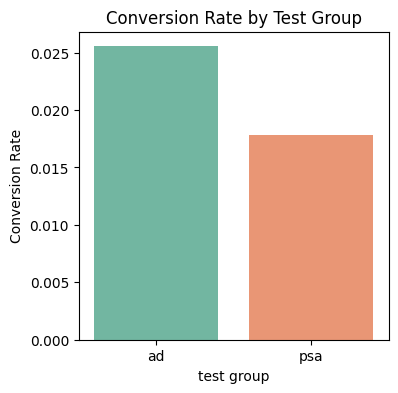

In [19]:
# Visualize
plt.figure(figsize=(4,4))
sns.barplot(x=conversion_rates.index, y=conversion_rates.values,palette='Set2')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Test Group')
plt.show()

### 6.Create Contingency Table and Chi-Square Test

In [20]:
# Contingency table
contingency = pd.crosstab(df['test group'], df['converted'])
print(contingency)

converted    False  True 
test group               
ad          550154  14423
psa          23104    420


In [21]:
# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)
print(f'Chi2 Statistic: {chi2}')
print(f'p-value: {p}')

if p < 0.05:
    print("Statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

Chi2 Statistic: 54.005823883685245
p-value: 1.9989623063390075e-13
Statistically significant difference between groups.


### 7.Explore the Effect of Total Ads

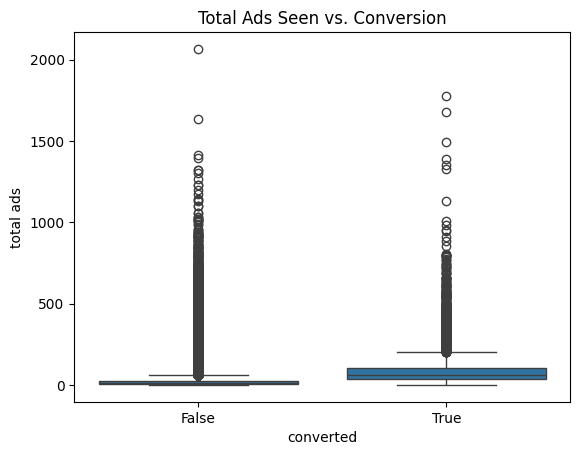

In [22]:
# Compare total ads seen by conversion
sns.boxplot(x='converted', y='total ads', data=df)
plt.title('Total Ads Seen vs. Conversion')
plt.show()

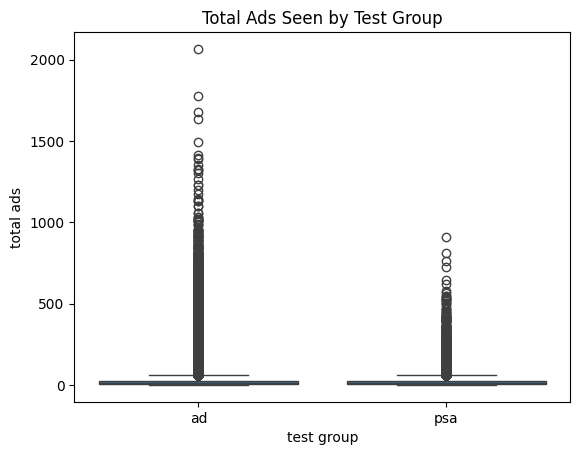

In [23]:
# Compare total ads seen by test group
sns.boxplot(x='test group', y='total ads', data=df)
plt.title('Total Ads Seen by Test Group')
plt.show()

### 8.Explore Most Ads Day and Most Ads Hour

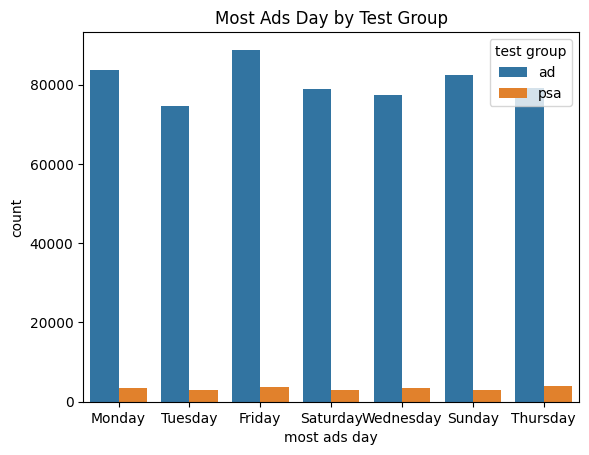

In [24]:
# Most ads day by test group
sns.countplot(x='most ads day', hue='test group', data=df)
plt.title('Most Ads Day by Test Group')
plt.show()

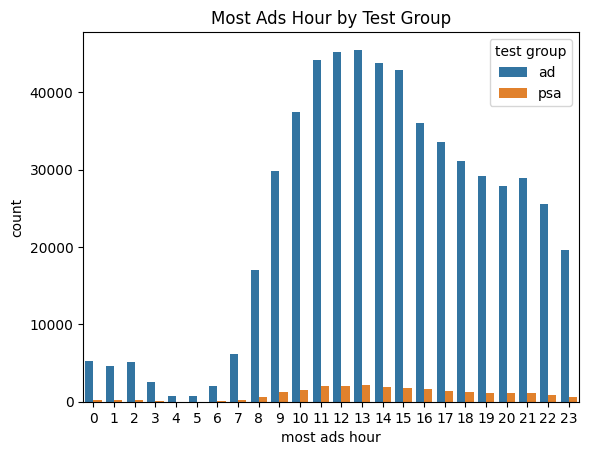

In [25]:
# Most ads hour by test group (optional: convert to int if needed)
sns.countplot(x='most ads hour', hue='test group', data=df)
plt.title('Most Ads Hour by Test Group')
plt.show()

### 9.Summary Table

In [26]:
summary = df.groupby('test group')['converted'].agg(['count', 'sum', 'mean'])
summary.rename(columns={'count': 'Total Users', 'sum': 'Converted', 'mean': 'Conversion Rate'}, inplace=True)
print(summary)

            Total Users  Converted  Conversion Rate
test group                                         
ad               564577      14423         0.025547
psa               23524        420         0.017854
